# ¿Es un lujo la vida saludable en Cuba?


In [1]:
import importlib 
import json
import src.gráficos as gr
import src.funciones as fn

mipyme = fn.cargar_json("data/mipymes.json")
nutrientes = fn.cargar_json("data/valor_nutricional.json")
evolución_precios = fn.cargar_json("data/evolución_precios.json")
productos = ['muslo de pollo', 'pechuga de pollo', 'higado de pollo', 'picadillo de pollo', 'huevo', 'molleja de pollo', 'lomo de cerdo', 'atún', 'pierna de cerdo', 'solmillo de cerdo', 'garbanzos', 'frijoles negros', 'frijoles colorados', 'leche de vaca', 'arroz', 'codito', 'espaguetis']

#0btener listas con el valor nutricional de los alimentos 
proteina = []
grasas = []
carbohidratos = []

#Este for busca en el diccionario los productos que tienen proteina, grasas y carbohidratos y los añade a su lista correspondiente
for producto in nutrientes:
    proteina.append(nutrientes[producto]["proteina"])
    grasas.append(nutrientes[producto]["grasas"])       
    carbohidratos.append(nutrientes[producto]["carbohidratos"])



Lograr una vida sana depende directamente de una buena alimentación. Para los cubanos comer saludable es un gran desafío ya que el salario promedio en Cuba no alcanza para obtener los nutrientes mínimos necesarios.
Los precios no paran de subir y esta gráfica lo confirma con datos: mes a mes ha subido el costo en La Habana de alimentos básicos como el arroz, el huevo, la carne de cerdo y los frijoles. En ella puedes ver los meses en la línea de abajo y los precios en la línea vertical, lo que confirma que hoy comprar es mucho más difícil que antes. Solo comprar una libra de arroz y una libra de frijoles cuesta casi el 10% del salario mensual de un cubano promedio. Esa cantidad alcanza solo para un día en una familia de cuatro. Si esa familia tuviera que hacer esa compra todos los días de un mes, el gasto total sobrepasaría el salario promedio en un 285.3% (es decir, sería casi tres veces mayor que todo el sueldo de un salario). Y esto es solo para dos productos que, además, no tienen todos los nutrientes que una persona necesita para estar saludable.

Con esta herramienta puedes ver la variación del precio del arroz, el huevo, la carne de cerdo y los frijoles. Solo escribe en el programa los productos de los que quieras saber el precio, y el gráfico te mostrará cómo han cambiado.

Precio minimo: 200 CUP en la fecha: 2024-01
Precio máximo: 415 CUP en la fecha: 2024-09
Precio promedio de los 23 meses: 256 CUP
Representa el 3.94% del salario promedio de un cubano
Variación del precio: 0 CUP. Representa el 0.00% respecto al 2024


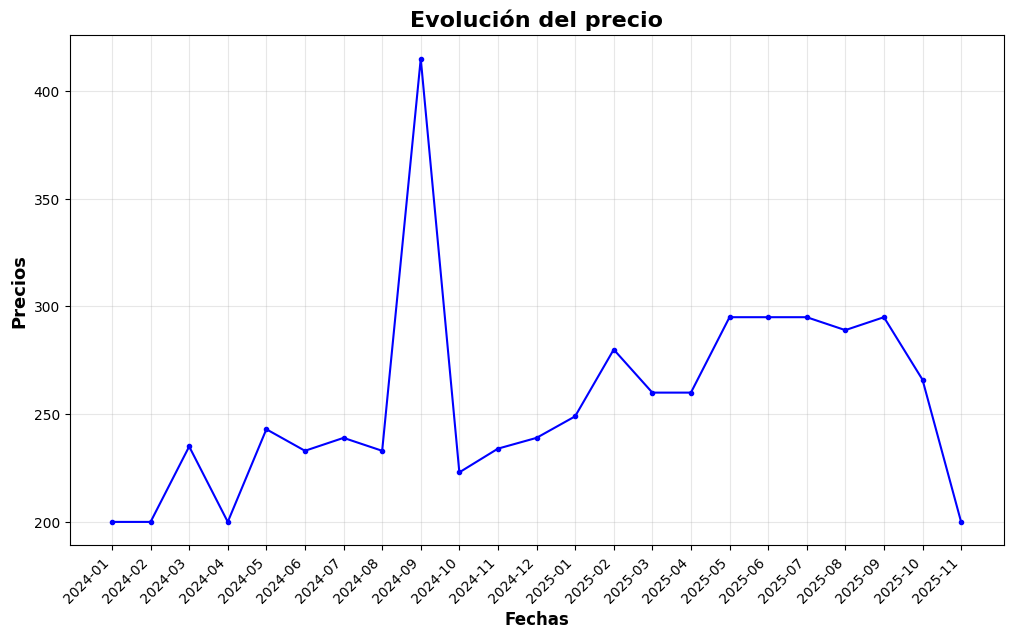

In [2]:
fechas, promedio_precio = fn.datos_evolución_precios(evolución_precios, "arroz") 


#Este código es para buscar el mínimo precio en la lista del promedio. Luego utilizo ".index" para buscar en la lista de las fechas la misma posición del producto para imprimir el precio asociada a la fecha
print(f"Precio minimo: {min(promedio_precio)} CUP en la fecha: {fechas[promedio_precio.index(min(promedio_precio))]}")

print(f"Precio máximo: {max(promedio_precio)} CUP en la fecha: {fechas[promedio_precio.index(max(promedio_precio))]}")

promedio_23meses = round(sum(promedio_precio)/len(promedio_precio))
print(f"Precio promedio de los 23 meses: {promedio_23meses} CUP")

print(f"Representa el {(promedio_23meses/6499 * 100):.2f}% del salario promedio de un cubano")

print(f"Variación del precio: {promedio_precio[-1] - promedio_precio[0]} CUP. Representa el {((promedio_precio[-1] - promedio_precio[0])/ promedio_precio[0]*100):.2f}% respecto al 2024") 

gr.evolución_precios(promedio_precio,fechas)

La Organización Mundial de la Salud señala que una [alimentación saludable](https://www.who.int/es/news-room/fact-sheets/detail/healthy-diet) nos protege de la malnutrición y de enfermedades graves como la diabetes, los problemas del corazón, los derrames cerebrales y el cáncer.
Estos beneficios vienen de los nutrientes que contienen los alimentos, los cuales se dividen en dos grupos principales

1) [Macronutrientes](https://www.fundacionparalasalud.org/infantil/202/macronutrientes): sustancias necesarias en grandes cantidades (proteínas, grasas y carbohidratos) que proporcionan energía al organismo para su funcionamiento, reparación, construcción de estructuras y crecimiento. Más información.

2) [Micronutrientes](https://www.paho.org/es/temas/micronutrientes) : vitaminas y minerales requeridos en pequeñas cantidades para la mayoría de las funciones celulares del cuerpo.
Para obtener una alimentación saludable, el cuerpo necesita consumir los nutrientes correctos. La cantidad exacta varía según la edad, el sexo, el estilo de vida y la actividad física de cada persona, pero los principios básicos de una buena dieta son los mismos para todos.

A continuación, se presenta un gráfico de pastel que muestra la proporción ideal de macronutrientes que una persona debería consumir al día. Este gráfico representa cómo se deberían distribuir las calorías totales entre proteínas, grasas y carbohidratos para seguir una dieta saludable.

Es importante respetar estas proporciones, ya que desviarse de ellas puede afectar la salud. El gráfico es una adaptación al contexto cubano de las recomendaciones de la [OMS/FON](https://iris.who.int/server/api/core/bitstreams/f06e1673-3689-4cb1-8a37-762a3e9c5360/content) , que establece un límite máximo de 75% de las calorías diarias provenientes de carbohidratos. Sin embargo, la realidad es que, aun ajustándose a este límite superior, el poder adquisitivo de muchos cubanos no les permite obtener las cantidades necesarias de proteínas y grasas. Por ello, la dieta se inclina inevitablemente hacia un mayor consumo de carbohidratos, que suelen ser los alimentos más accesibles y económicos en el país.


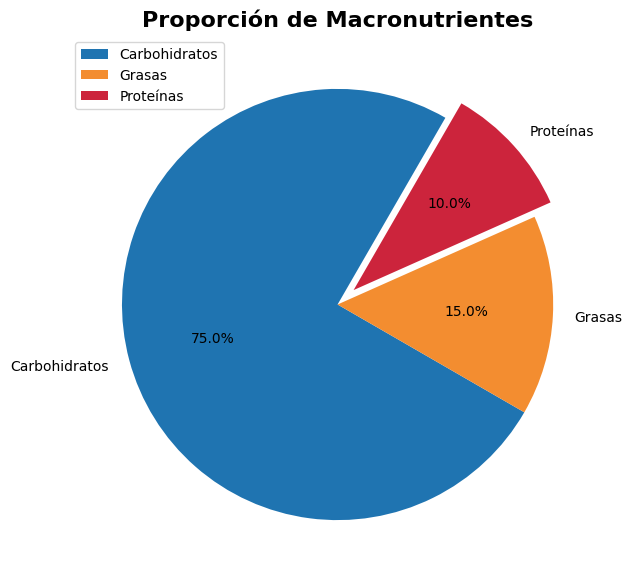

In [3]:
gr.proporción_macronutrientes()

A partir de la proporción mostrada en el gráfico, se puede calcular la cantidad exacta en gramos de cada macronutriente (proteínas, grasas y carbohidratos) que una persona debe consumir.

Esta cantidad en gramos varía directamente con el total de kilocalorías que cada quien necesita al día. Es decir, a más calorías necesarias, mayor será la cantidad de gramos de cada macronutriente que debes ingerir.

Para hacer este cálculo personalizado y sencillo, puedes usar este programa. Solo debes ingresar la cantidad de kilocalorías que debes consumir diariamente, y el programa te devolverá automáticamente la cantidad exacta recomendada, expresada en gramos, para cada uno de los tres macronutrientes

In [4]:
resultado = fn.calcular_macronutrientes(2600)
for clave, valor in resultado.items(): # para mostrar los resultados de forma más clara
    print(f"{clave}: {valor} g")

carbohidratos: 487.5 g
grasas: 43.33 g
proteinas: 65.0 g


Para alcanzar los niveles recomendados de macronutrientes, la [OMS](https://www.who.int/es/news-room/fact-sheets/detail/healthy-diet) sugiere una dieta diversa: proteínas provenientes del cerdo, pollo o legumbres (frijoles y garbanzos); carbohidratos mediante el arroz y pastas; y grasas saludables presentes en la leche y en carnes como la pierna de cerdo o el atún. 
En la siguiente gráfica comparamos los precios promedio de estos alimentos. Para que sea una comparación justa, casi todos los precios son por una libra, menos en dos excepciones: el huevo, donde el precio es por una unidad, y el atún, donde el precio es por una lata.


Al observar los datos, resaltan contrastes significativos que definen la dieta del cubano. En el sector de las carnes, el hígado de pollo se posiciona como la opción más económica, mientras que el solomillo de cerdo se corona como el artículo de mayor lujo. En el ámbito de las legumbres, el frijol negro aparece como el cuarto alimento más barato de la lista, confirmando su rol histórico como base de la pirámide alimenticia en la isla.
Un dato revelador es la comparación entre carbohidratos: el espagueti resulta ser más económico que el arroz. No obstante muchos de estos productos baratos, aunque calman el hambre, no logran cubrir de manera óptima los requerimientos de macronutrientes esenciales para una vida realmente saludable.

{'muslo de pollo': 673.93, 'pechuga de pollo': 1230.55, 'higado de pollo': 431.82, 'picadillo de pollo': 494.39, 'huevo': 103.55, 'molleja de pollo': 510.29, 'lomo de cerdo': 1222.2, 'atún': 576.84, 'pierna de cerdo': 1004.75, 'solmillo de cerdo': 1578.59, 'garbanzos': 609.11, 'frijoles negros': 573.55, 'frijoles colorados': 632.2, 'leche de vaca': 1198.5, 'arroz': 341.21, 'codito': 372.54, 'espaguetis': 329.7}


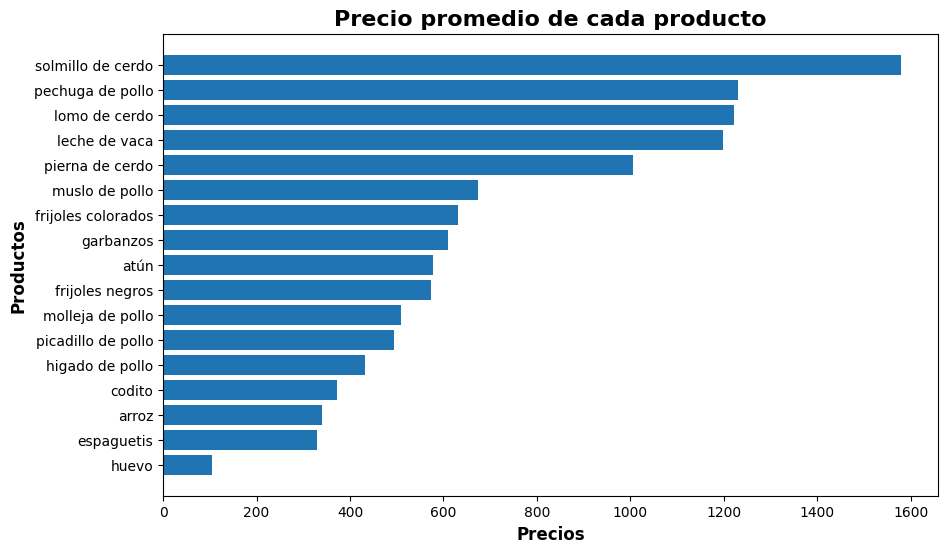

In [5]:
precio = fn.precio_promedio_lb(productos,mipyme)
print(precio)

#Este código es para ordenar un dicionario por el valor de su llave correspondiente
claves_ordenadas = sorted(precio, key=precio.get)   #La función sorted ordena los valores que estan entre parentesis, Key=precio.get le indica como debe ordenar
                                                    #precio.get es otra forma de acceder a los valores de un diccionario. Se escribe "Key" para ordenar las llaves del diccionario por los valores correspondientes
valores_ordenados = []

for clave in claves_ordenadas:
    valores_ordenados.append(round(precio[clave])) #Este for itera sobre las claves ordenadas, añade a la lista los valores del diccionario en el mismo orden de las claves ordenadas


gr.barra_costo_promedio(claves_ordenadas,valores_ordenados)

Más allá de verificar los productos más baratos, resulta fundamental analizar cuánto debe invertir realmente un cubano para obtener cada gramo de los nutrientes que su cuerpo necesita. El siguiente gráfico de barras apiladas revela esta relación de eficiencia, donde los segmentos de color permiten identificar qué tan caro resulta adquirir proteínas, carbohidratos o grasas de forma individual dentro de cada producto.

Al observar estos datos, es evidente que los frijoles negros se consolidan como la fuente de proteína más económica para la población cubana, mientras que en la categoría de carbohidrato, los espaguetis logran superar incluso al arroz en términos de costo por gramo de carbohidrato. Por otro lado, la pierna de cerdo aparece como la opción más accesible para cubrir los requerimientos de grasas, completando así un mapa de consumo donde estos alimentos se posicionan como los más eficientes. Este fenómeno ocurre porque dichos productos no solo tienen un precio competitivo en las Mipymes, sino que poseen una alta densidad nutricional, lo que permite al consumidor obtener una mayor cantidad de nutrientes por cada peso invertido.

Alimento más económico para obtener proteina:>> frijoles negros
Alimento más económico para obtener grasa:>> pierna de cerdo
Alimento más económico para obtener carbohidratos:>> espaguetis


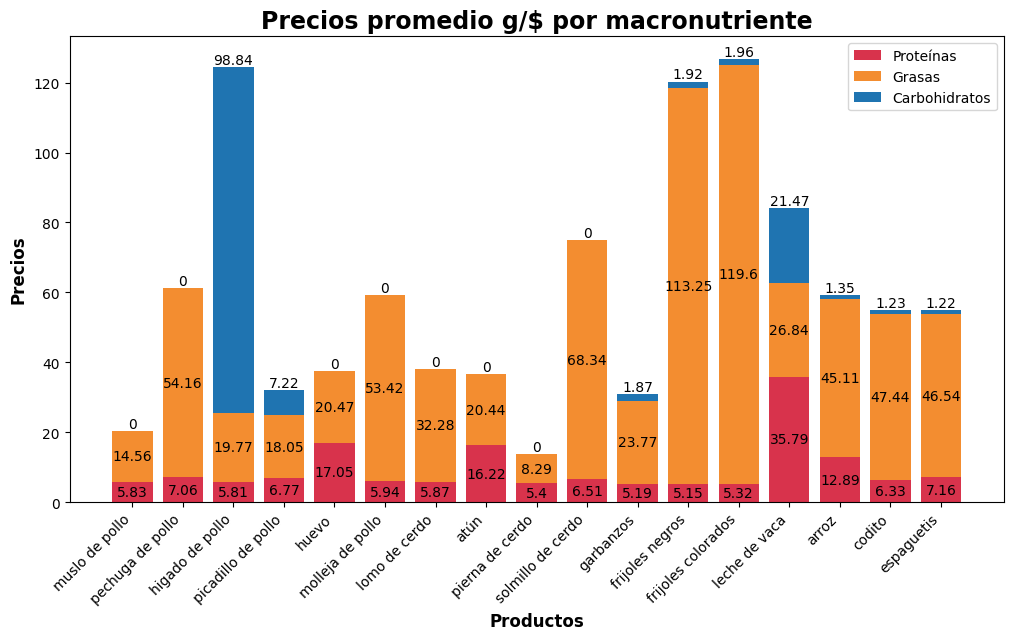

In [6]:
import matplotlib.pyplot as plt

protein = fn.costo_promedio_nutr(mipyme, productos,proteina)
gras = fn.costo_promedio_nutr(mipyme, productos, grasas)
car = fn.costo_promedio_nutr(mipyme, productos,carbohidratos)



p = list(protein.values())
g = list(gras.values())
c = list(car.values())

c_positivos = [valor for valor in c if valor > 0] #mucha de la comida tiene 0 carbohidratos, así que esta lista solo toma los valores positivos para evitar errores al buscar el mínimo

print(f"Alimento más económico para obtener proteina:>> {productos[p.index(min(p))]}")
print(f"Alimento más económico para obtener grasa:>> {productos[g.index(min(g))]}")
print(f"Alimento más económico para obtener carbohidratos:>> {productos[c.index(min(c_positivos))]}")

gr.barra_apilada(productos,c,p,g)
 

En el mercado cubano actual, el muslo de pollo suele percibirse como la opción más económica, sin embargo, aunque su precio de venta es menor, no ofrece una mayor densidad proteica que las legumbres. Al analizar los datos de las 30 Mipymes, descubrimos que los frijoles negros se consolidan como la fuente de proteína más barata y eficiente disponible.

Para dimensionar este impacto, el siguiente gráfico compara el salario promedio frente al costo total mensual necesario para cubrir los requerimientos de proteína de un adulto. Como se puede observar, existe una brecha alarmante: incluso optando por la fuente más eficiente, se requiere una inversión mensual equivalente a la compra de 18 libras de frijol solo para alcanzar los niveles proteicos básicos. Este costo consume casi la totalidad del ingreso promedio, demostrando que en el contexto actual, satisfacer esta necesidad biológica no es una elección de dieta, sino un objetivo financiero prácticamente inalcanzable

Cantidad de libras de muslo de pollo: 17
Cantidad de libras de frijoles negros: 18



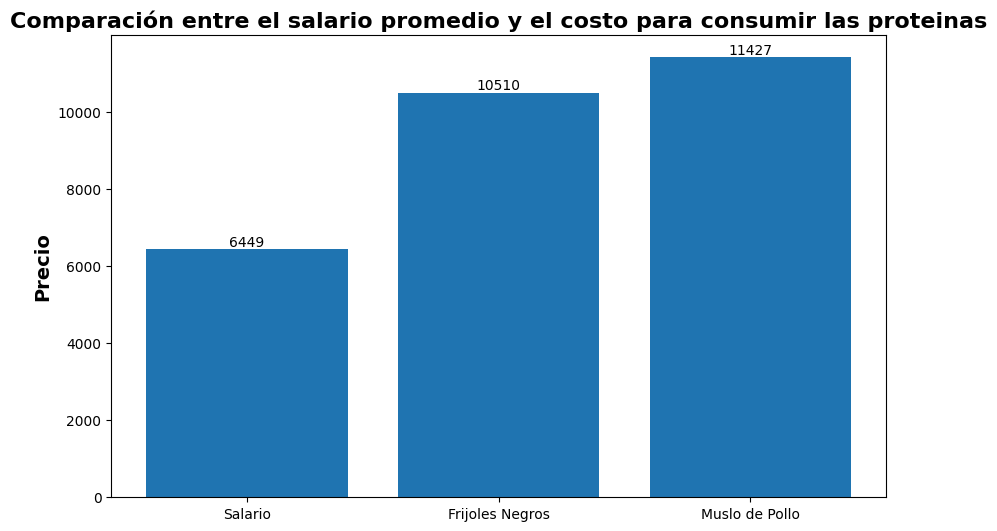

In [7]:
data = fn.calcular_macronutrientes(2600)
d = data["proteinas"] # gramos diarios de proteina necesarios 

muslo_pollo_1g = 5.86
frijoles_negros_1g = 5.39
costo_mensual_frijoles = round(d*frijoles_negros_1g*30)
costo_mensual_muslo_pollo = round(d*muslo_pollo_1g*30)

print(f"Cantidad de libras de muslo de pollo: {round(costo_mensual_muslo_pollo/673.93)}")
print(f"Cantidad de libras de frijoles negros: {round(costo_mensual_frijoles/573.55)}")
print()

gr.comparación(costo_mensual_frijoles, costo_mensual_muslo_pollo)
